In [1]:
#Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

def replace_third_underscore(s):
    parts = s.split('_')
    if len(parts) < 4:
        return s
    return '_'.join(parts[:1]) + '-' + '_'.join(parts[1:])


target = '/content/drive/MyDrive/test_set/images'  # Directory with the original files

# Iterate over each file in the target directory
for path in os.listdir(target):
    # Construct the full path
    full_path = os.path.join(target, path)

    # Skip directories, only rename files
    if os.path.isfile(full_path):

        # Replace the third underscore with a dash (
        new_name = replace_third_underscore(path)
        new_full_path = os.path.join(target, new_name)

        # Rename the file
        os.rename(full_path, new_full_path)
        print(f"Renamed '{path}' to '{new_name}'")


Renamed 'hurricane-florence-00000509_pre_disaster.png' to 'hurricane-florence-00000509_pre_disaster.png'
Renamed 'hurricane-florence-00000491_pre_disaster.png' to 'hurricane-florence-00000491_pre_disaster.png'
Renamed 'hurricane-florence-00000507_pre_disaster.png' to 'hurricane-florence-00000507_pre_disaster.png'
Renamed 'hurricane-florence-00000488_pre_disaster.png' to 'hurricane-florence-00000488_pre_disaster.png'
Renamed 'hurricane-florence-00000483_pre_disaster.png' to 'hurricane-florence-00000483_pre_disaster.png'
Renamed 'hurricane-florence-00000160_pre_disaster.png' to 'hurricane-florence-00000160_pre_disaster.png'
Renamed 'hurricane-florence-00000150_pre_disaster.png' to 'hurricane-florence-00000150_pre_disaster.png'
Renamed 'hurricane-florence-00000145_pre_disaster.png' to 'hurricane-florence-00000145_pre_disaster.png'
Renamed 'hurricane-florence-00000143_pre_disaster.png' to 'hurricane-florence-00000143_pre_disaster.png'
Renamed 'hurricane-florence-00000141_pre_disaster.png' 

In [3]:
import tifffile as tiff
import cv2
import matplotlib.pyplot as plt
import numpy as np
image_paths = "/content/drive/MyDrive/test_set/images"
target_paths = "/content/drive/MyDrive/test_set/targets"
result_paths = "/content/drive/MyDrive/test_set/results"

ids = []
for path in os.listdir(image_paths):
    id = path.split("_")[0]
    ids.append(id)

imgs = []
i = 0
for id in ids[30:100]:
    image_path = os.path.join(image_paths, id + "_pre_disaster.png")
    imgs.append(cv2.imread(image_path))

    i += 1
    if i == 37:
      print(image_path)
targets=[]
for id in ids[30:100]:
    target_path = os.path.join(target_paths, "test_localization_" + id + "_target.png")
    targets.append(cv2.imread(target_path, cv2.IMREAD_GRAYSCALE).astype(np.uint8))

results=[]
for id in ids[30:100]:
    result_path = os.path.join(result_paths, "test_localization_" + id + "_prediction.png")
    results.append(cv2.imread(result_path, cv2.IMREAD_GRAYSCALE).astype(np.uint8))



/content/drive/MyDrive/test_set/images/midwest-flooding-00000000_pre_disaster.png


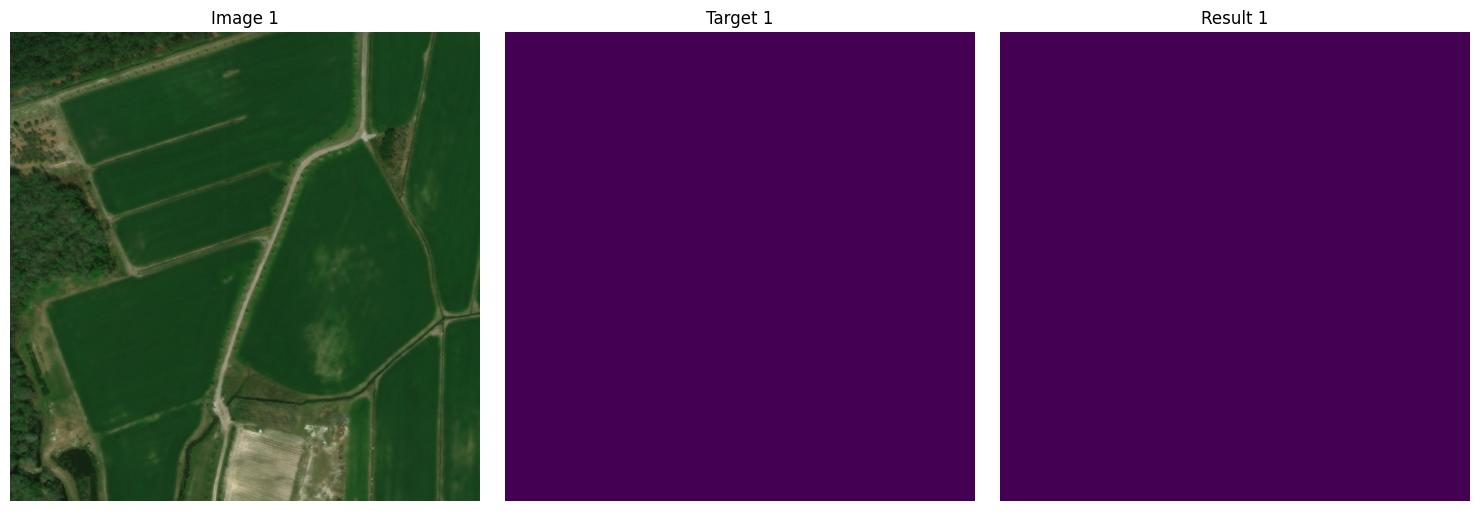

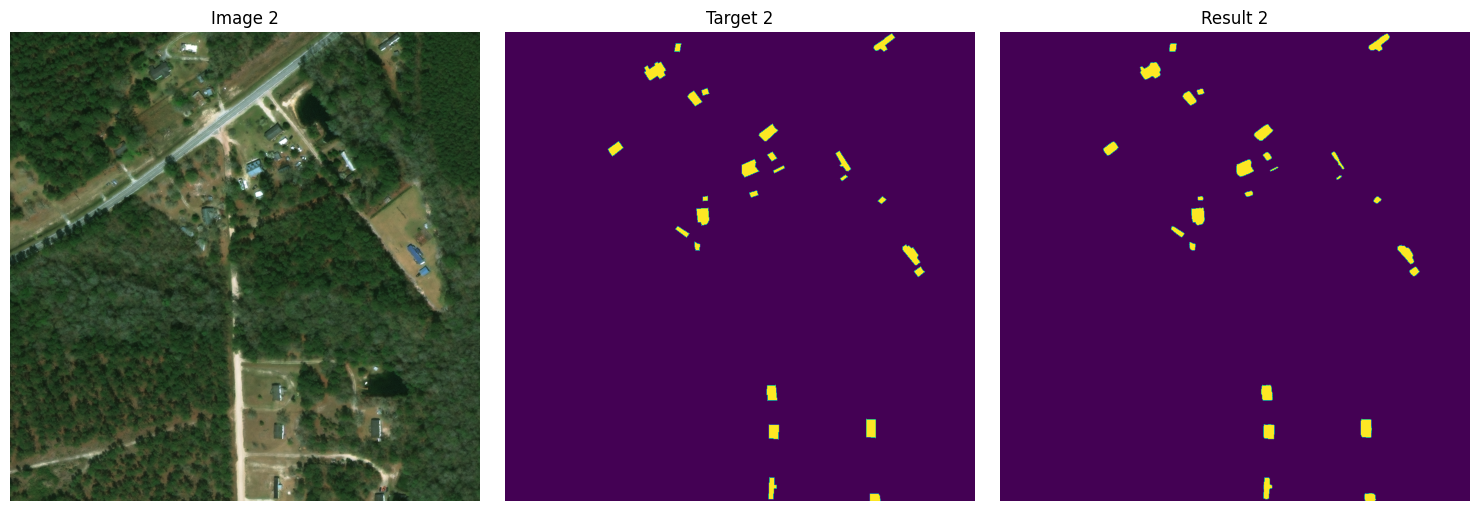

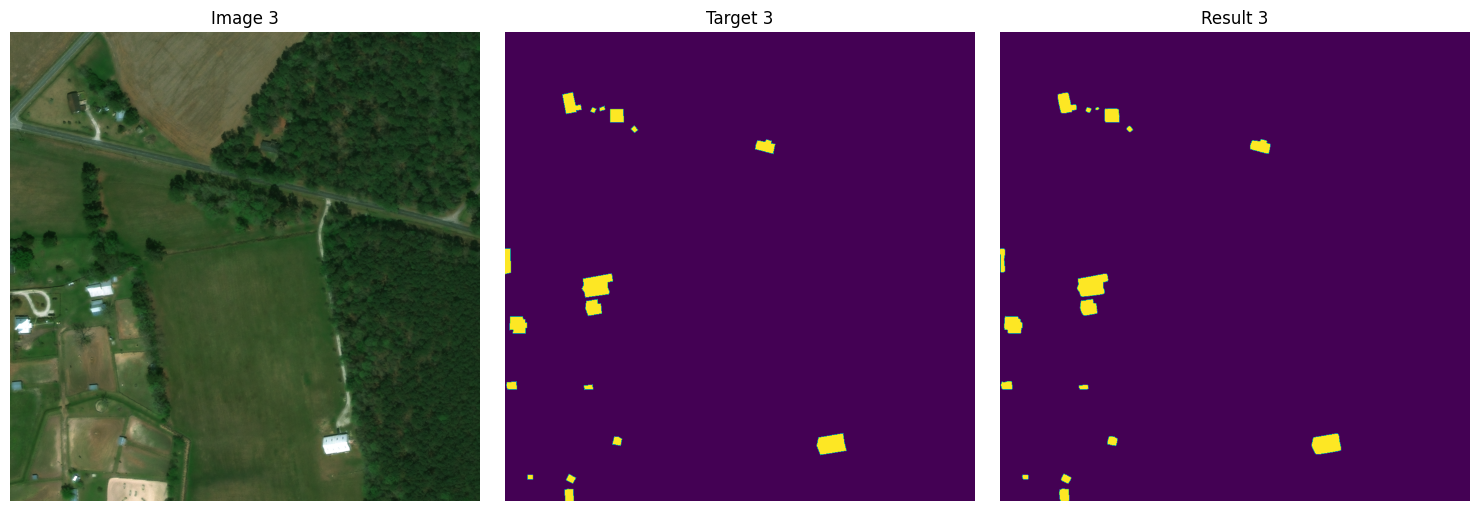

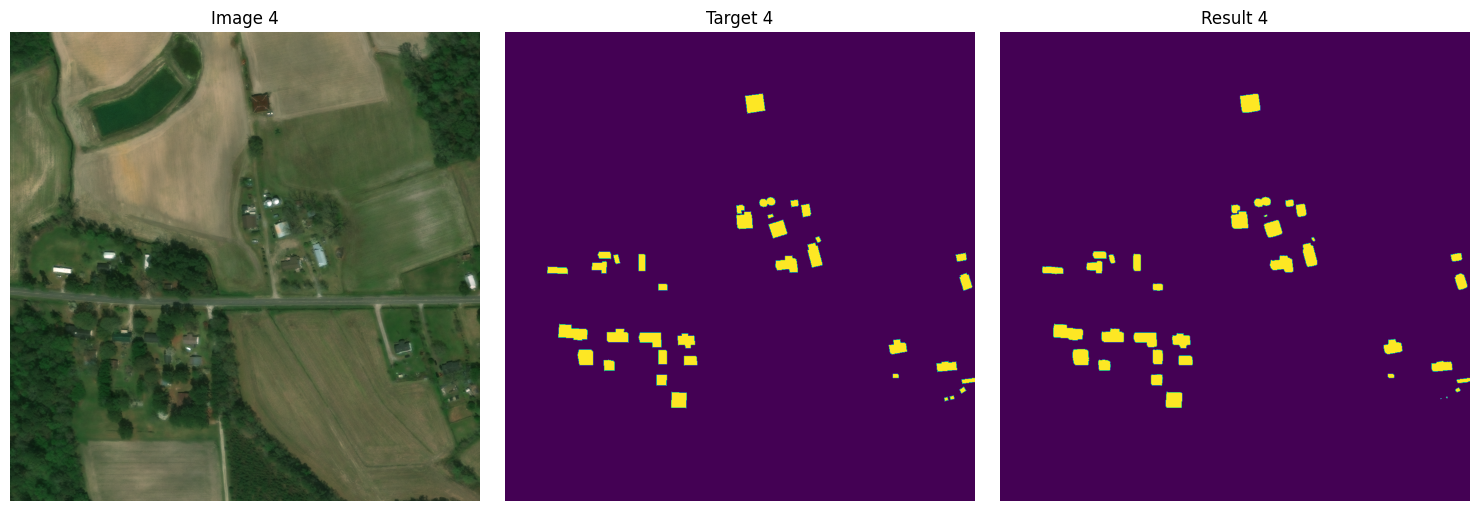

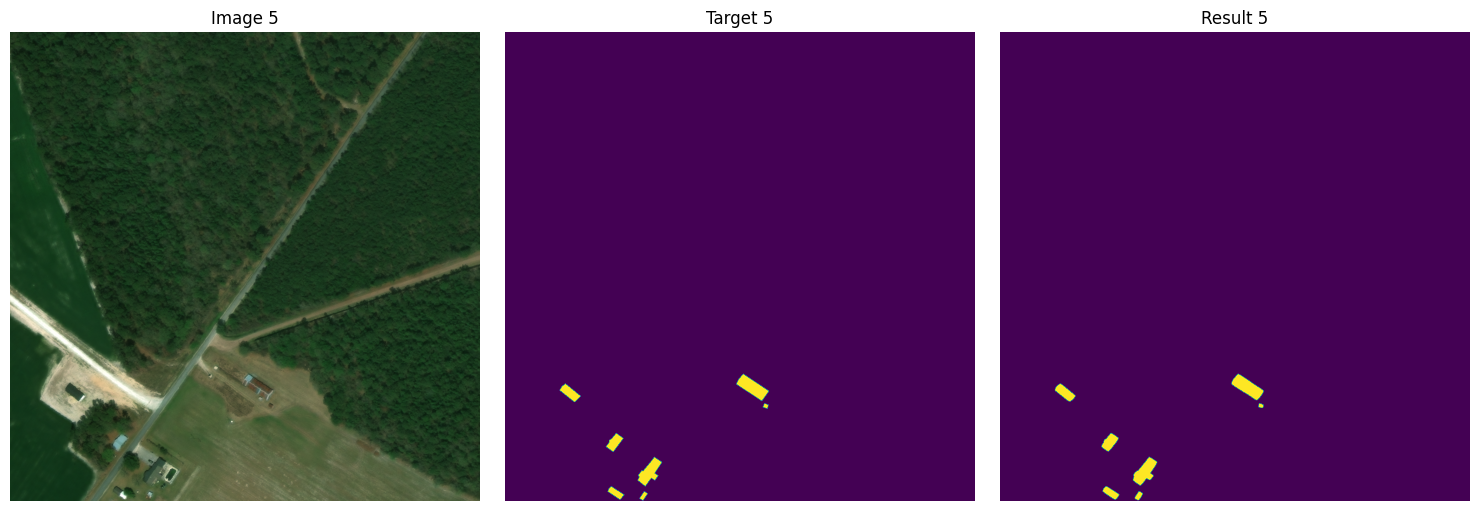

In [5]:
num_rows = len(imgs)

# Displaying each set of images in different figures
for i in range(5):
    # Creating a new figure for each set of images
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    # Plotting each image in the set side by side
    axs[0].imshow(imgs[i])
    axs[0].set_title('Image ' + str(i+1))
    axs[0].axis('off')

    axs[1].imshow(targets[i])
    axs[1].set_title('Target ' + str(i+1))
    axs[1].axis('off')

    axs[2].imshow(results[i])
    axs[2].set_title('Result ' + str(i+1))
    axs[2].axis('off')

    # Adjust layout and display the plot for the current set
    plt.tight_layout()
    plt.show()